# NetworkX Tutorial

Going through the Python NetworkX library tutorial in order to better understand graph processing libraries. This can have the benefit of helping the development speed, runtime speed, and readability of the graph algorithms which will be implemented as part of this semester project.

## Basics

In [1]:
import networkx as nx

In [2]:
# A collection of nodes and edges.
#  * Nodes can be ANY hashable object.
#  * When adding nodes or edges to a graph, NetworkX quietly ignores any 
#    which are already present.
G = nx.Graph()

In [13]:
# Make sure you don't mess up the graph, which is constructed
# in a procedural fashion! Rerunning notebook cells can lead to
# unexpected results.
G.clear()
G.add_node(1)
G.add_nodes_from([2, 3])

# Can also use: G.number_of_edges(), G.number_of_nodes()
print("Edge count: {}".format(G.size()))
print("Node count: {}".format(G.order()))

Edge count: 0
Node count: 3


In [15]:
G.clear()
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 3)
e = (2, 3)
G.add_edge(*e)    # Simple tuple unpacking.

print("Edge count: {}".format(G.size()))
print("Node count: {}".format(G.order()))
print(G.nodes())

to_remove = 3
G.remove_node(to_remove)
print("Removed node {}".format(to_remove))

print("Edge count: {}".format(G.size()))
print("Node count: {}".format(G.order()))
print(G.nodes())

Edge count: 2
Node count: 3
[1, 2, 3]
Removed node 3
Edge count: 0
Node count: 2
[1, 2]


In [18]:
# Iterating edges.
FG = nx.Graph()
FG.add_weighted_edges_from([
        (1, 2, 0.125),
        (1, 3, 0.750),
        (2, 4, 1.200),
        (3, 4, 0.375)])

print("Note the duplicate occurrences!")
for n,nbrs in FG.adjacency_iter():
   for nbr,eattr in nbrs.items():
       data=eattr['weight']
       if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

Note the duplicate occurrences!
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [21]:
print("Duplicate-free edge iteration:")
for (u,v,d) in FG.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

Duplicate-free edge iteration:
(4, 3, 0.125)
(4, 3, 0.375)


## Graph analysis

This is where using such a library starts really paying off!

In [32]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node('alone')
G.add_edge(3, 4)
print("Connected components")
print(list(nx.connected_components(G)))
print("Nodes in ascending order of degree:")
print(sorted(zip(G.nodes(), nx.degree(G).values()), key=lambda x: x[1]))

print("Clustering coefficients:")
print(nx.clustering(G))

print("After ading a 3-clique:")
G.add_edges_from([[5, 6], [6, 7], [5, 7]])
print(nx.clustering(G))

Connected components
[{1, 2, 3, 4}, {'alone'}]
Nodes in ascending order of degree:
[('alone', 0), (2, 1), (4, 1), (1, 2), (3, 2)]
Clustering coefficients:
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 'alone': 0.0}
After ading a 3-clique:
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1.0, 6: 1.0, 'alone': 0.0, 7: 1.0}


## Rendering

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

[0, 1, 2, 3, 4, 5, 6, 7]


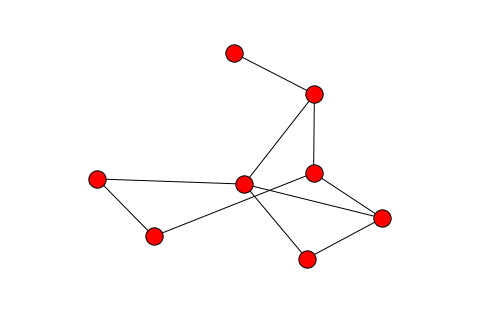

In [59]:
G_draw = nx.sedgewick_maze_graph()
nx.draw(G_draw)
print(G_draw.nodes())

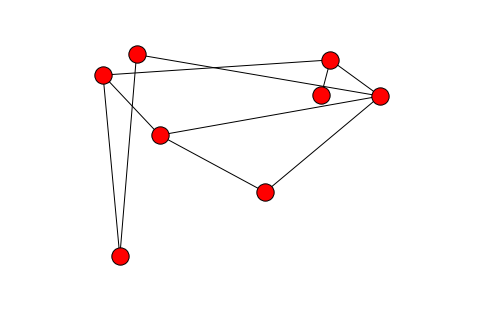

In [60]:
# As the name implies, this renders the graph in a different way
# every time.
nx.draw_random(G_draw)

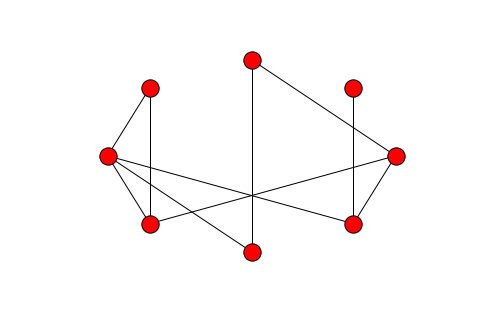

In [61]:
nx.draw_circular(G_draw)

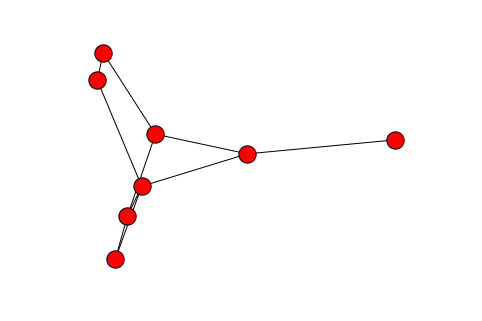

In [62]:
nx.draw_spectral(G_draw)

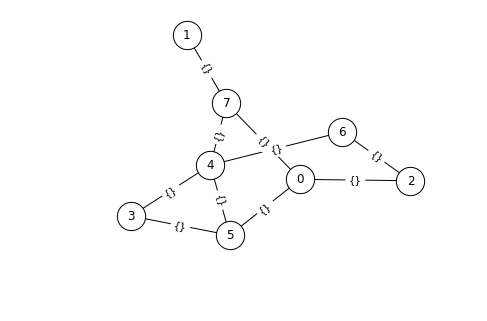

In [64]:
# Compute layout using graphviz, and render additional data,
# such as node and edge labels.

from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(G_draw)
nx.draw(G_draw, pos, node_size=800, node_color='w')
_ = nx.draw_networkx_labels(G_draw, pos)
_ = nx.draw_networkx_edge_labels(G_draw, pos)